In [2]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.misc
import tensorflow as tf

# Train on Dense

- Expected plot is from GoogLeNet inception_5b3x3 layer.
- According to author, they found this progression of weight distribution **very representive for VGGNet and ResNet** as well.

In [4]:
# Load VGG16
model = tf.keras.applications.VGG16(include_top=True, weights='imagenet')

In [6]:
# block5_conv3 (Conv2D)
w = np.array(model.layers[-6].weights[0])

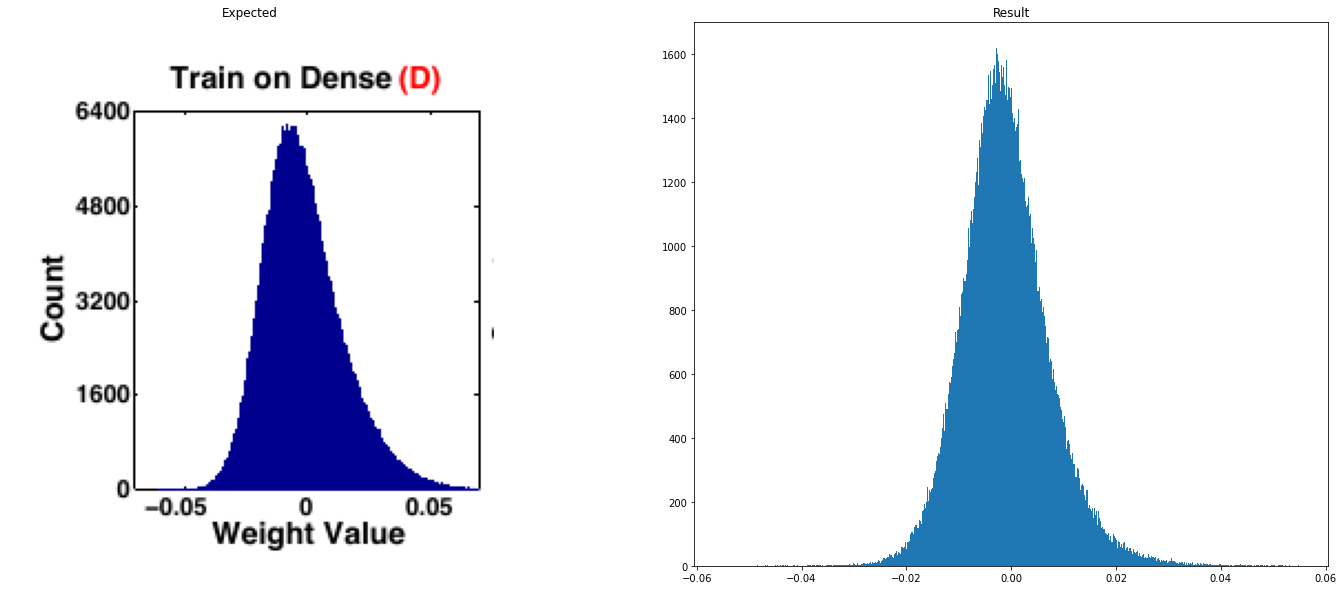

In [57]:
fig = plt.figure(figsize=(25,10))

# --- Expected ---
fig.add_subplot(1,2,1)
plt.title("Expected")
plt.axis('off')
img = mpimg.imread("../img/test_1.png")
plt.imshow(img)

# --- Result ---
fig.add_subplot(1,2,2)
# Take 1st block among the 3 Conv block.
x = w[0].flatten()
# Apply Freedman–Diaconis rule to find optimal bins witdh.
q25, q75 = np.percentile(x, [.25,.75])
IQR = q75 - q25
bin_width = 2*(IQR / (len(x)**(1/3)))
bins = round((x.max() - x.min())/bin_width)
# print("Freedman–Diaconis number of bins:", bins)
plt.title("Result")
plt.hist(x, bins = bins, range=(-0.055, 0.055));

# Train on Dense